In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly

# DeveloperType

In [2]:
DeveloperType= pd.read_csv("Dataframe_folder/DeveloperType_HE.csv")
DeveloperType.head()

,Unnamed: 0,Desktop applications developer,Embedded applications/devices developer,Mobile developer,DevOps specialist,Web developer,Other,Database administrator,Systems administrator,Graphic designer,Developer with a statistics or mathematics background,Data scientist,Graphics programming,Quality assurance engineer,Machine learning specialist
0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,4,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,8,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,9,1,0,1,0,0,0,0,0,0,0,0,0,0,0


# HaveWorkedDatabase

In [3]:
HWD = pd.read_csv("Dataframe_folder/language/HaveWorkedDatabase_df.csv")
HWD.head()

,Unnamed: 0,Redis,PostgreSQL,Oracle,MySQL,SQL Server,MongoDB,SQLite,Cassandra
0,1,0,0,0,1,0,0,1,0
1,2,0,0,0,1,0,0,0,0
2,3,1,0,0,1,1,1,1,0
3,5,0,0,0,1,0,0,0,0
4,6,0,0,0,0,0,0,1,0


### - DeveloperType과 HaveWorkedDatabase  모두 응답한 사람만 추출
- 다시 DeveloperType과 HaveWorkedDatabase 테이블로 나눠줌

In [4]:
HWD_DT = pd.merge(DeveloperType,HWD,on='Unnamed: 0')
HWD = HWD_DT.loc[:,"Redis":"Cassandra"]
developerType = HWD_DT.loc[:,"Desktop applications developer":"Machine learning specialist"]

In [5]:
developerType_T = developerType.T
index =[]
DT =[]
for i in range(developerType.count()[1]):
    i_DT = []
    i_DT.append(developerType_T[developerType_T[i]==1][i].index)
    for dt in i_DT[0]:
        index.append(i)
        DT.append(dt)
    
developerType = pd.DataFrame({"index":index,"DeveloperType":DT} )   

In [6]:
HWD_DT = pd.merge(developerType,HWD,left_on = "index",right_index=True)
HWD_DT = HWD_DT.loc[:,"DeveloperType":"Cassandra"]
HWD_DT_Result = HWD_DT.groupby("DeveloperType").sum()
HWD_DT_Result

,Redis,PostgreSQL,Oracle,MySQL,SQL Server,MongoDB,SQLite,Cassandra
DeveloperType,,,,,,,,
Data scientist,380,785,418,1121,793,613,610,154
Database administrator,672,1175,689,2405,2030,871,1078,140
Desktop applications developer,641,1549,1497,3122,4112,1160,2147,181
DevOps specialist,914,1158,519,1671,1060,900,806,200
Developer with a statistics or mathematics background,456,862,559,1377,1060,634,806,150
Embedded applications/devices developer,260,560,299,1029,663,409,806,83
Graphic designer,105,252,125,672,345,229,327,21
Graphics programming,132,278,162,624,381,243,397,31
Machine learning specialist,217,399,170,500,292,315,313,106


In [7]:
HWD_DT_Result["Sum"]=HWD_DT_Result.sum(axis=1)
HWD_DT_Result

,Redis,PostgreSQL,Oracle,MySQL,SQL Server,MongoDB,SQLite,Cassandra,Sum
DeveloperType,,,,,,,,,
Data scientist,380,785,418,1121,793,613,610,154,4874
Database administrator,672,1175,689,2405,2030,871,1078,140,9060
Desktop applications developer,641,1549,1497,3122,4112,1160,2147,181,14409
DevOps specialist,914,1158,519,1671,1060,900,806,200,7228
Developer with a statistics or mathematics background,456,862,559,1377,1060,634,806,150,5904
Embedded applications/devices developer,260,560,299,1029,663,409,806,83,4109
Graphic designer,105,252,125,672,345,229,327,21,2076
Graphics programming,132,278,162,624,381,243,397,31,2248
Machine learning specialist,217,399,170,500,292,315,313,106,2312


In [8]:
HWD_DT_Per = HWD_DT_Result
for i in range(len(HWD_DT_Per.columns)-1):
    HWD_DT_Per[HWD_DT_Per.columns[i]] = HWD_DT_Per[HWD_DT_Per.columns[i]]/HWD_DT_Per[HWD_DT_Per.columns[len(HWD_DT_Per.columns)-1]]*100
HWD_DT_Per = HWD_DT_Per.loc[:,"Redis":"Cassandra"]

In [9]:
HWD_DT_Per = HWD_DT_Per.T

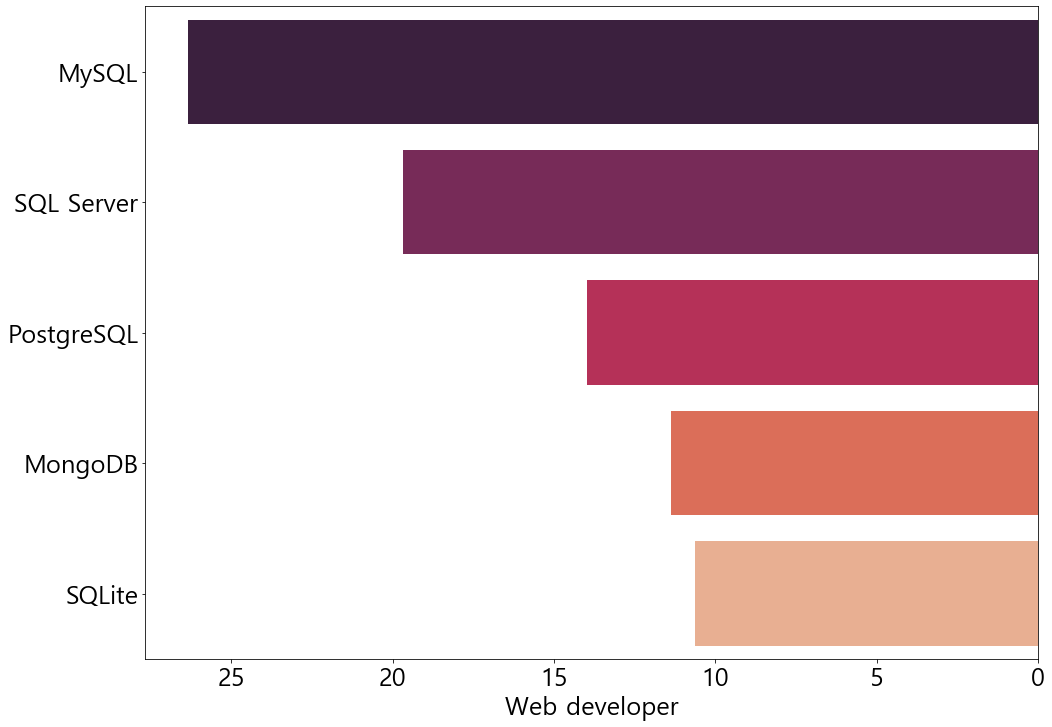

In [12]:
import matplotlib.font_manager as fm
import matplotlib as mpl

font_name = fm.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
font={"family" : font_name,"size":25}
plt.rc('font', **font)##한글폰트
mpl.rcParams['axes.unicode_minus'] = False #마이너스표시

HWD_DT_Per_Top5 = HWD_DT_Per.sort_values(by=["Web developer"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Web developer',HWD_DT_Per_Top5.index,data=HWD_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Web_HaveWorkedDatabase.png')
fig

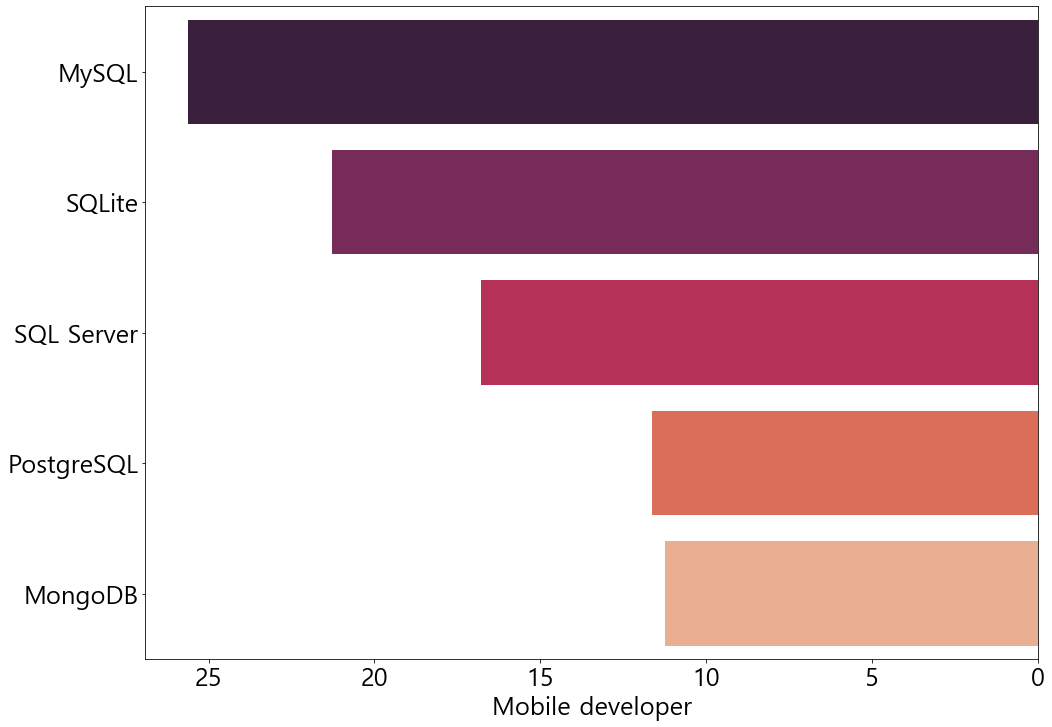

In [11]:
HWD_DT_Per_Top5 = HWD_DT_Per.sort_values(by=["Mobile developer"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Mobile developer',HWD_DT_Per_Top5.index,data=HWD_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Mobile_HaveWorkedDatabase', dpi=300)
fig

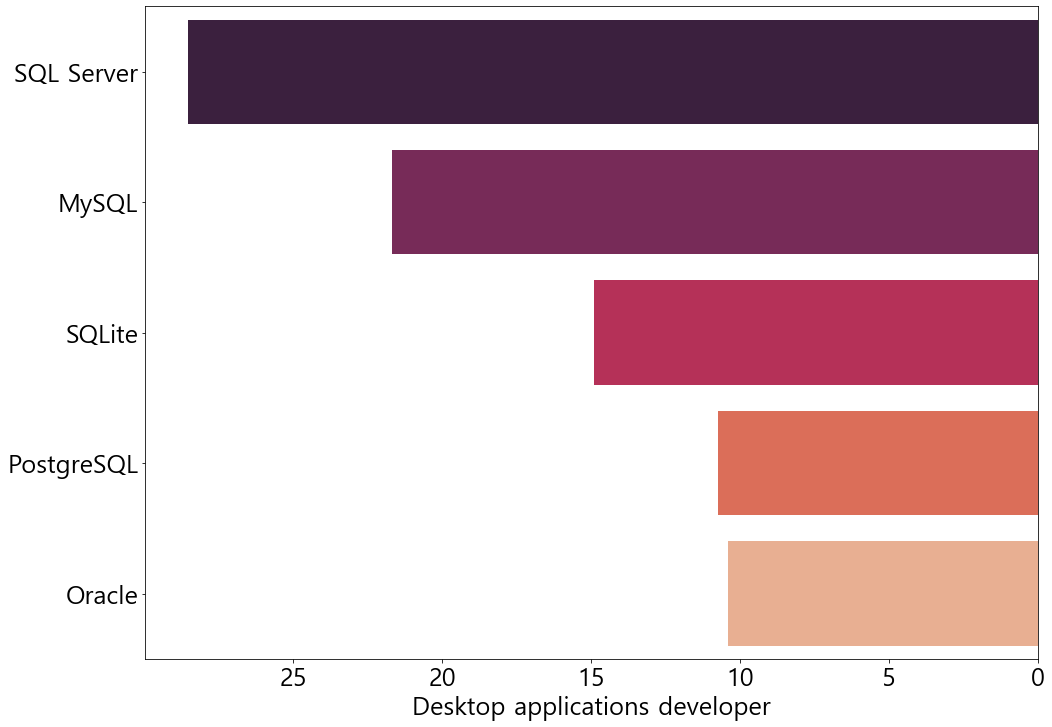

In [12]:
HWD_DT_Per_Top5 = HWD_DT_Per.sort_values(by=["Desktop applications developer"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Desktop applications developer',HWD_DT_Per_Top5.index,data=HWD_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Desktop_HaveWorkedDatabase.png', dpi=300)
fig

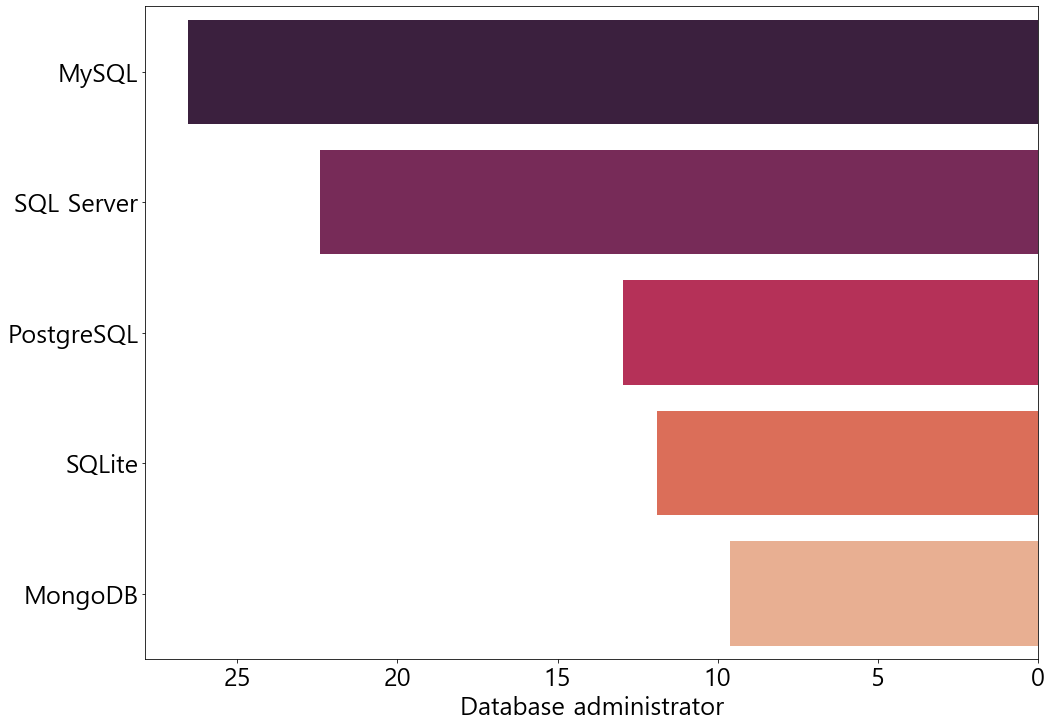

In [13]:
HWD_DT_Per_Top5 = HWD_DT_Per.sort_values(by=["Database administrator"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Database administrator',HWD_DT_Per_Top5.index,data=HWD_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Database_HaveWorkedDatabase.png', dpi=300)
fig

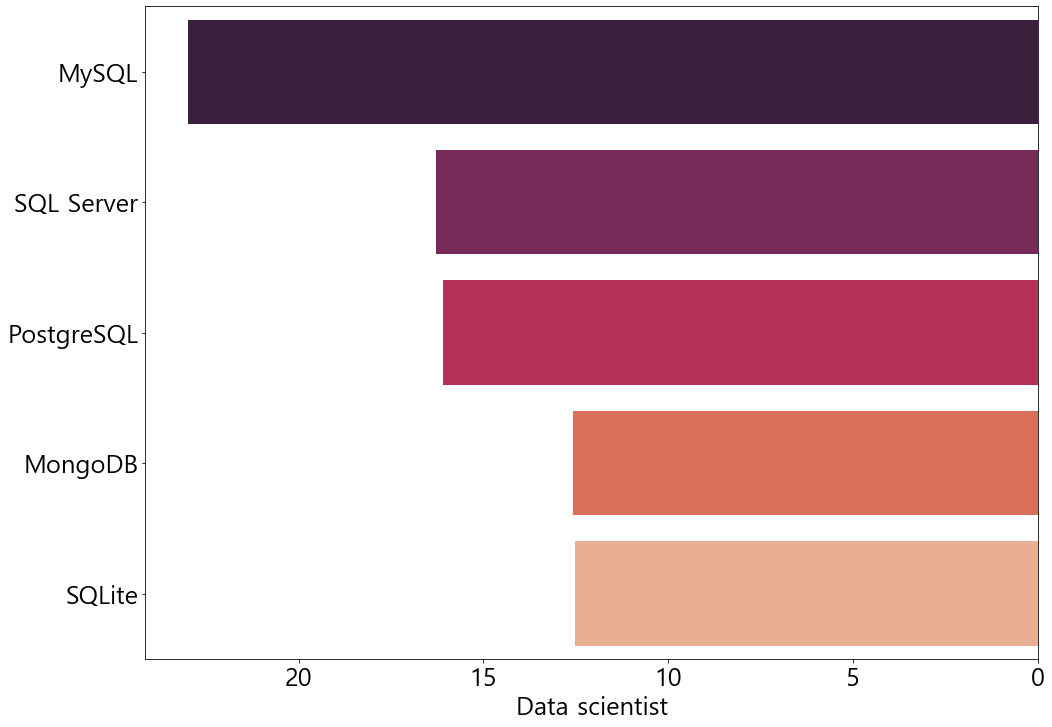

In [14]:
HWD_DT_Per_Top5 = HWD_DT_Per.sort_values(by=["Data scientist"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Data scientist',HWD_DT_Per_Top5.index,data=HWD_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Data_HaveWorkedDatabase.png', dpi=300)
fig

# HaveWorkedLanguage

In [15]:
HWL = pd.read_csv("Dataframe_folder/language/HaveWorkedLanguage_df.csv")
HWL.head()

,Unnamed: 0,Julia,VBA,Common Lisp,Lua,Hack,Perl,Haskell,Erlang,Java,...,Scala,C#,R,JavaScript,Python,PHP,Groovy,Rust,Go,F#
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [16]:
HWL_DT = pd.merge(DeveloperType,HWL,on='Unnamed: 0')
HWL = HWL_DT.loc[:,"Julia":"F#"]
developerType = HWL_DT.loc[:,"Desktop applications developer":"Machine learning specialist"]

In [17]:
developerType_T = developerType.T
index =[]
DT =[]
for i in range(developerType.count()[1]):
    i_DT = []
    i_DT.append(developerType_T[developerType_T[i]==1][i].index)
    for dt in i_DT[0]:
        index.append(i)
        DT.append(dt)
    
developerType = pd.DataFrame({"index":index,"DeveloperType":DT} )  

In [18]:
HWL_DT = pd.merge(developerType,HWL,left_on = "index",right_index=True)
HWL_DT = HWL_DT.loc[:,"DeveloperType":"F#"]
HWL_DT_Result = HWL_DT.groupby("DeveloperType").sum()
HWL_DT_Result["Sum"]=HWL_DT_Result.sum(axis=1)
HWL_DT_Result

,Julia,VBA,Common Lisp,Lua,Hack,Perl,Haskell,Erlang,Java,CoffeeScript,...,C#,R,JavaScript,Python,PHP,Groovy,Rust,Go,F#,Sum
DeveloperType,,,,,,,,,,,,,,,,,,,,,
Data scientist,32,170,33,90,15,167,74,30,1014,100,...,765,399,1379,1172,631,106,38,162,53,10793
Database administrator,15,361,36,131,20,284,65,40,1532,190,...,1876,156,3105,1197,1779,139,41,222,71,18793
Desktop applications developer,22,567,56,236,16,322,113,49,3252,182,...,4846,216,4890,2074,1759,265,88,299,194,33872
DevOps specialist,19,117,31,115,19,266,72,45,1348,218,...,1087,126,2353,1353,1018,260,65,378,76,14375
Developer with a statistics or mathematics background,30,166,46,107,14,207,99,41,1390,117,...,1125,310,1796,1337,699,134,55,189,72,13824
Embedded applications/devices developer,11,134,33,162,11,181,51,44,1102,67,...,968,87,1311,1115,618,104,51,152,31,12183
Graphic designer,6,61,14,42,7,52,24,11,377,64,...,380,37,878,263,592,22,14,49,18,4878
Graphics programming,10,63,19,102,9,75,32,12,532,60,...,582,33,853,441,435,34,32,67,26,6183
Machine learning specialist,21,58,23,62,12,72,43,20,523,55,...,328,202,585,661,244,61,26,92,35,5360


In [19]:
HWL_DT_Per = HWL_DT_Result
for i in range(len(HWL_DT_Result.columns)-1):
    HWL_DT_Per[HWL_DT_Per.columns[i]] = HWL_DT_Per[HWL_DT_Per.columns[i]]/HWL_DT_Per[HWL_DT_Per.columns[len(HWL_DT_Result.columns)-1]]*100
HWL_DT_Per = HWL_DT_Per.loc[:,"Julia":"F#"]
HWL_DT_Per = HWL_DT_Per.T

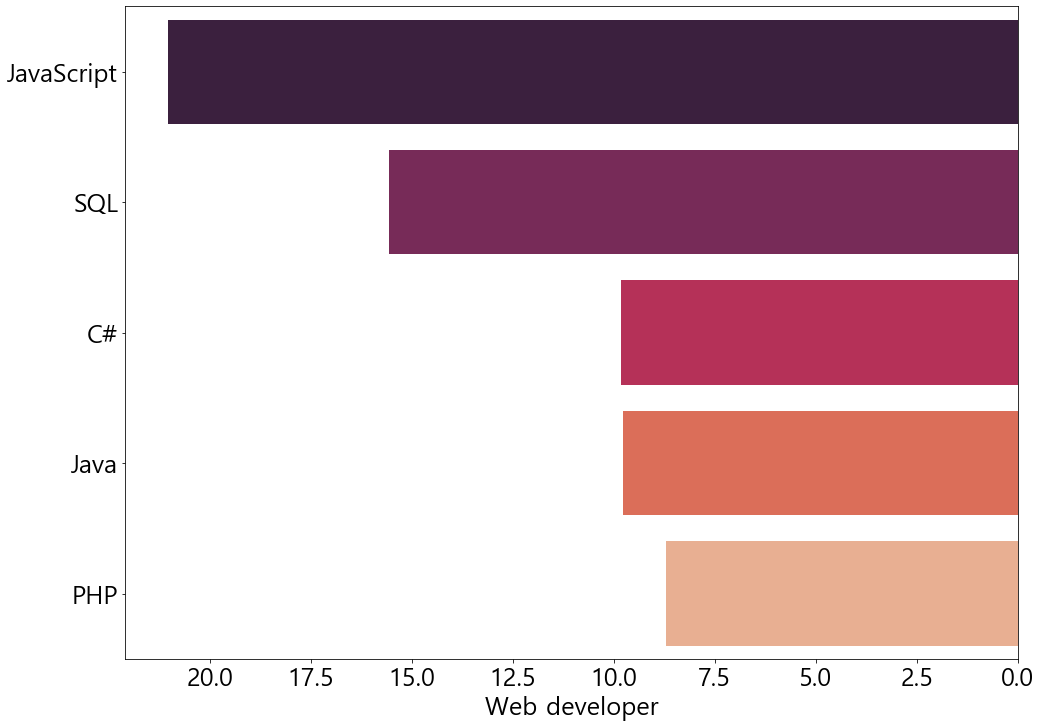

In [20]:
HWL_DT_Per_Top5 = HWL_DT_Per.sort_values(by=["Web developer"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Web developer',HWL_DT_Per_Top5.index,data=HWL_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Web_HaveWorkedLanguage.png', dpi=300)
fig

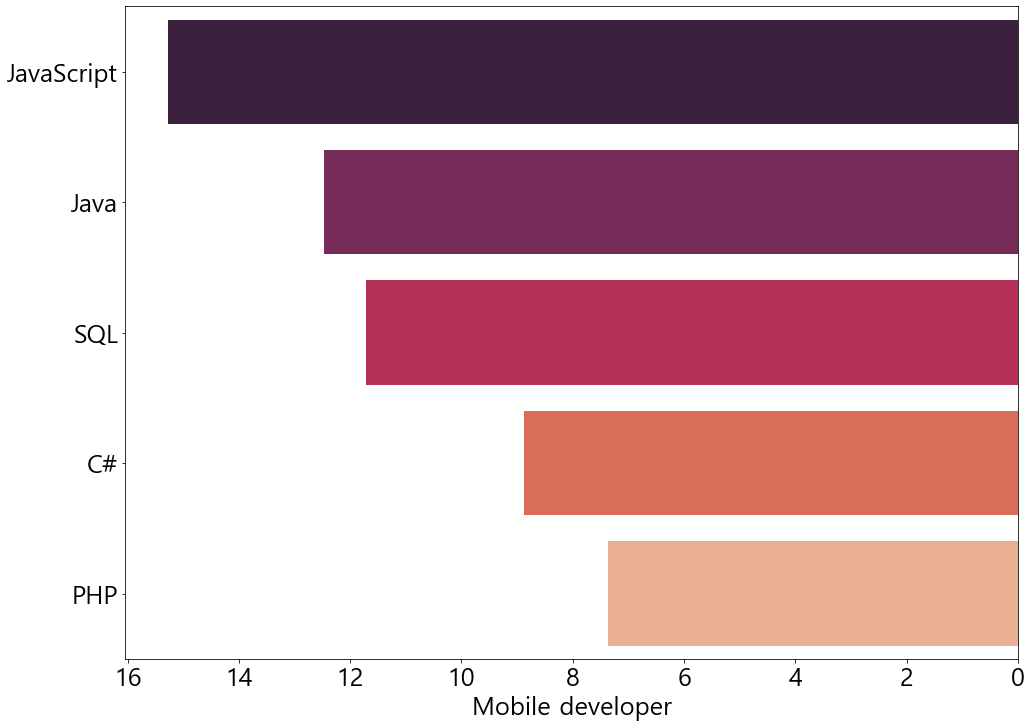

In [21]:
HWL_DT_Per_Top5 = HWL_DT_Per.sort_values(by=["Mobile developer"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Mobile developer',HWL_DT_Per_Top5.index,data=HWL_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Mobile_HaveWorkedLanguage.png', dpi=300)
fig

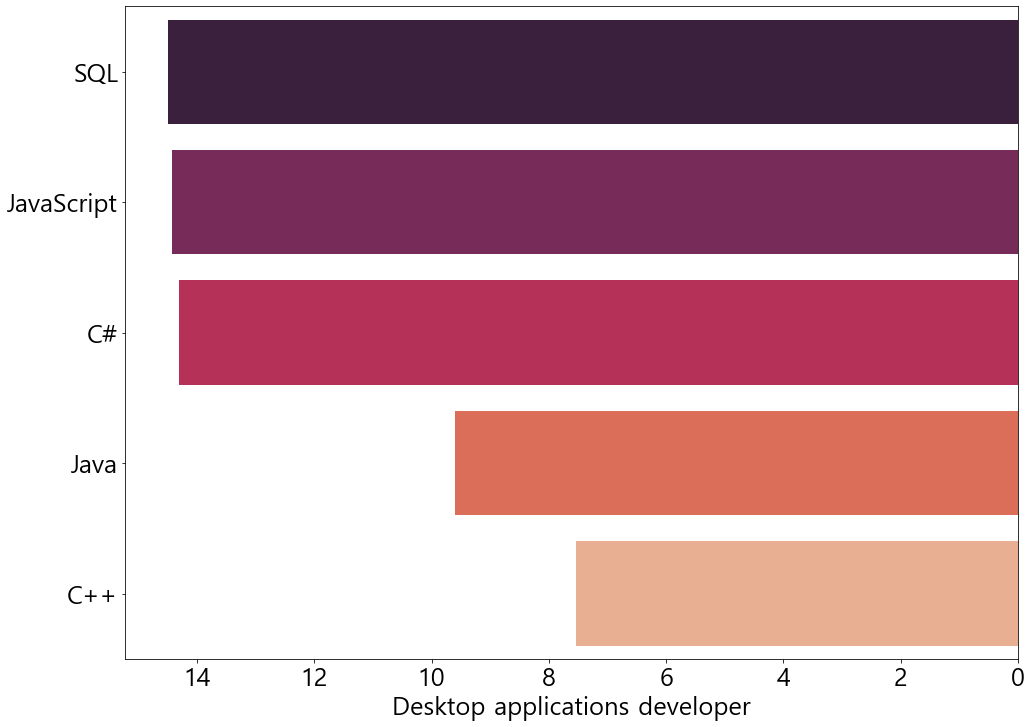

In [22]:
HWL_DT_Per_Top5 = HWL_DT_Per.sort_values(by=["Desktop applications developer"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Desktop applications developer',HWL_DT_Per_Top5.index,data=HWL_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Desktop_HaveWorkedLanguage.png', dpi=300)
fig

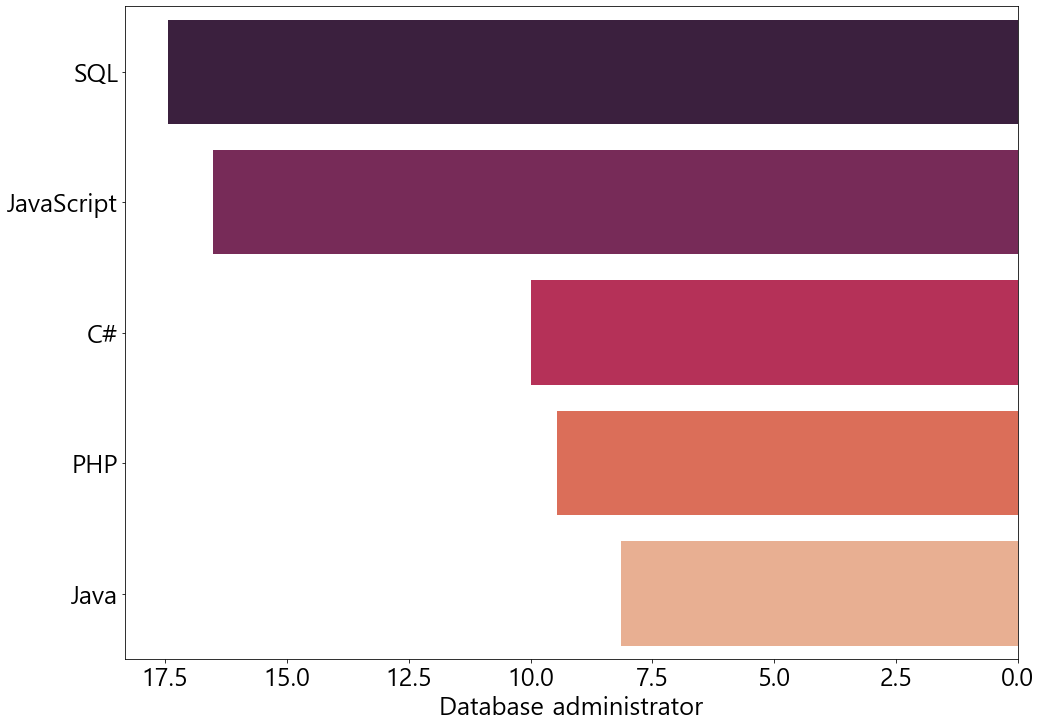

In [23]:
HWL_DT_Per_Top5 = HWL_DT_Per.sort_values(by=["Database administrator"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Database administrator',HWL_DT_Per_Top5.index,data=HWL_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Database_HaveWorkedLanguage.png', dpi=300)
fig

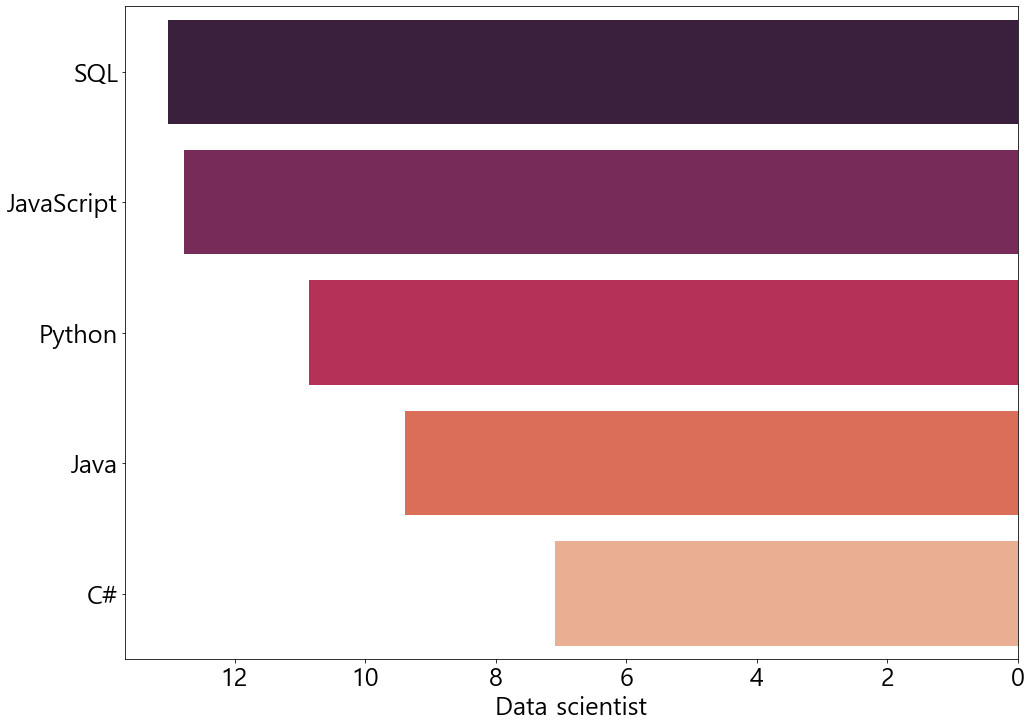

In [24]:
HWL_DT_Per_Top5 = HWL_DT_Per.sort_values(by=["Data scientist"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Data scientist',HWL_DT_Per_Top5.index,data=HWL_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Data_HaveWorkedLanguage.png', dpi=300)
fig

# HaveWorkedPlatform

In [40]:
HWP = pd.read_csv("Dataframe_folder/language/HaveWorkedPlatform_df.csv")
HWP.head()

,Unnamed: 0,Mainframe,Raspberry Pi,Linux Desktop,SharePoint,Amazon Web Services (AWS),Android,Windows Phone,WordPress,iOS,Mac OS,Microsoft Azure,Arduino,Serverless,Salesforce,Windows Desktop
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
3,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
HWP_DT = pd.merge(DeveloperType,HWP,on='Unnamed: 0')
HWP = HWP_DT.loc[:,"Mainframe":"Salesforce"]
developerType = HWP_DT.loc[:,"Desktop applications developer":"Machine learning specialist"]
developerType_T = developerType.T
index =[]
DT =[]
for i in range(developerType.count()[1]):
    i_DT = []
    i_DT.append(developerType_T[developerType_T[i]==1][i].index)
    for dt in i_DT[0]:
        index.append(i)
        DT.append(dt)
    
developerType = pd.DataFrame({"index":index,"DeveloperType":DT} )  
HWP_DT = pd.merge(developerType,HWP,left_on = "index",right_index=True)
HWP_DT = HWP_DT.loc[:,"DeveloperType":"Salesforce"]
HWP_DT_Result = HWP_DT.groupby("DeveloperType").sum()
HWP_DT_Result["Sum"]=HWP_DT_Result.sum(axis=1)
HWP_DT_Result.rename(columns = {"Amazon Web Services (AWS)": "AWS"}, inplace = True)
HWP_DT_Result

,Mainframe,Raspberry Pi,Linux Desktop,SharePoint,AWS,Android,Windows Phone,WordPress,iOS,Mac OS,Microsoft Azure,Arduino,Serverless,Salesforce,Sum
DeveloperType,,,,,,,,,,,,,,,
Data scientist,56,379,851,94,753,524,104,282,306,443,256,244,57,66,4415
Database administrator,81,624,1136,172,1222,1029,172,743,629,662,593,373,76,124,7636
Desktop applications developer,107,1143,2118,342,1383,2027,460,786,1148,1159,1136,743,118,154,12824
DevOps specialist,75,604,1100,116,1439,679,107,449,468,675,528,275,168,124,6807
Developer with a statistics or mathematics background,71,428,1125,103,914,685,111,333,425,542,317,289,58,79,5480
Embedded applications/devices developer,51,738,1158,80,527,886,141,262,446,405,228,542,43,43,5550
Graphic designer,15,158,244,40,260,368,71,341,268,210,112,126,23,28,2264
Graphics programming,18,233,455,39,266,484,96,215,317,290,128,190,24,22,2777
Machine learning specialist,37,197,453,45,410,270,59,119,177,244,133,129,43,27,2343


In [42]:
HWP_DT_Per = HWP_DT_Result
for i in range(len(HWP_DT_Result.columns)-1):
    HWP_DT_Per[HWP_DT_Per.columns[i]] = HWP_DT_Per[HWP_DT_Per.columns[i]]/HWP_DT_Per[HWP_DT_Per.columns[len(HWP_DT_Per.columns)-1]]*100
HWP_DT_Per = HWP_DT_Per.loc[:,"Mainframe":"Salesforce"]
HWP_DT_Per = HWP_DT_Per.T

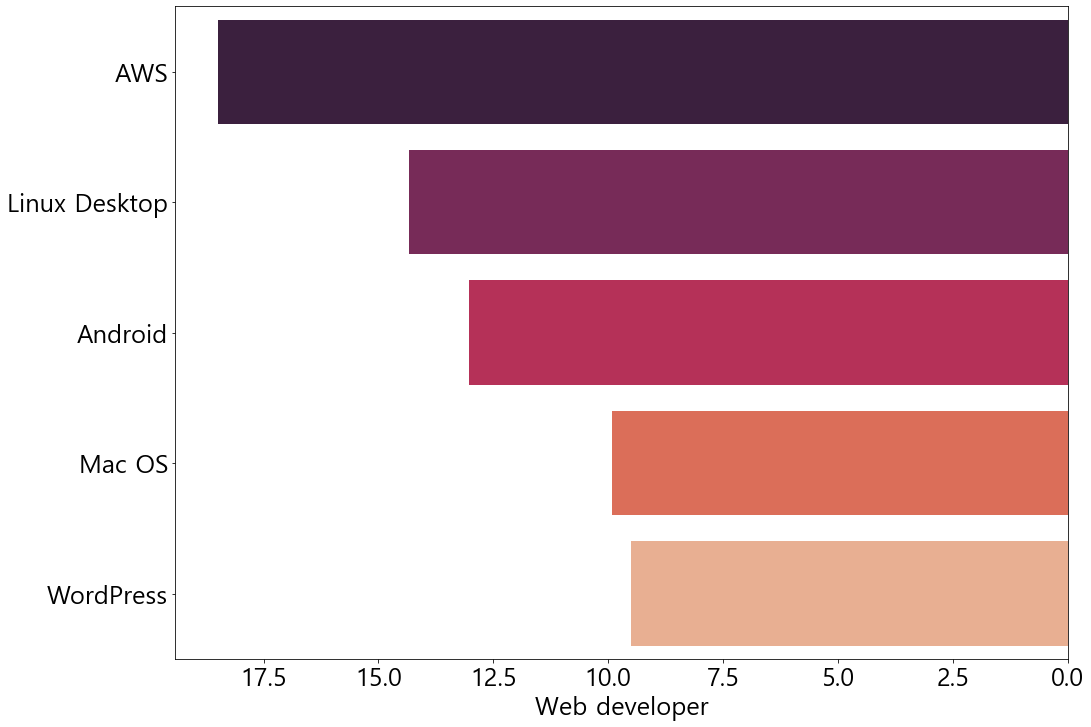

In [43]:
HWP_DT_Per_Top5 = HWP_DT_Per.sort_values(by=["Web developer"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Web developer',HWP_DT_Per_Top5.index,data=HWP_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Web_HaveWorkedPlatform.png')
fig

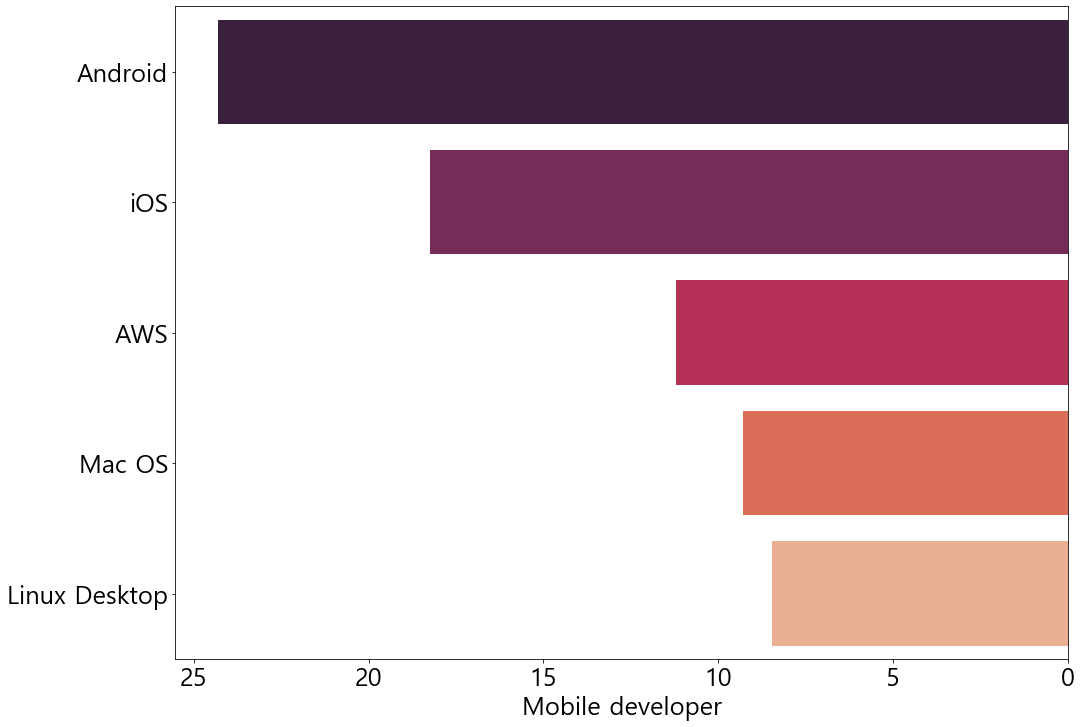

In [44]:
HWP_DT_Per_Top5 = HWP_DT_Per.sort_values(by=["Mobile developer"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Mobile developer',HWP_DT_Per_Top5.index,data=HWP_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Mobile_HaveWorkedPlatform.png', dpi=300)
fig

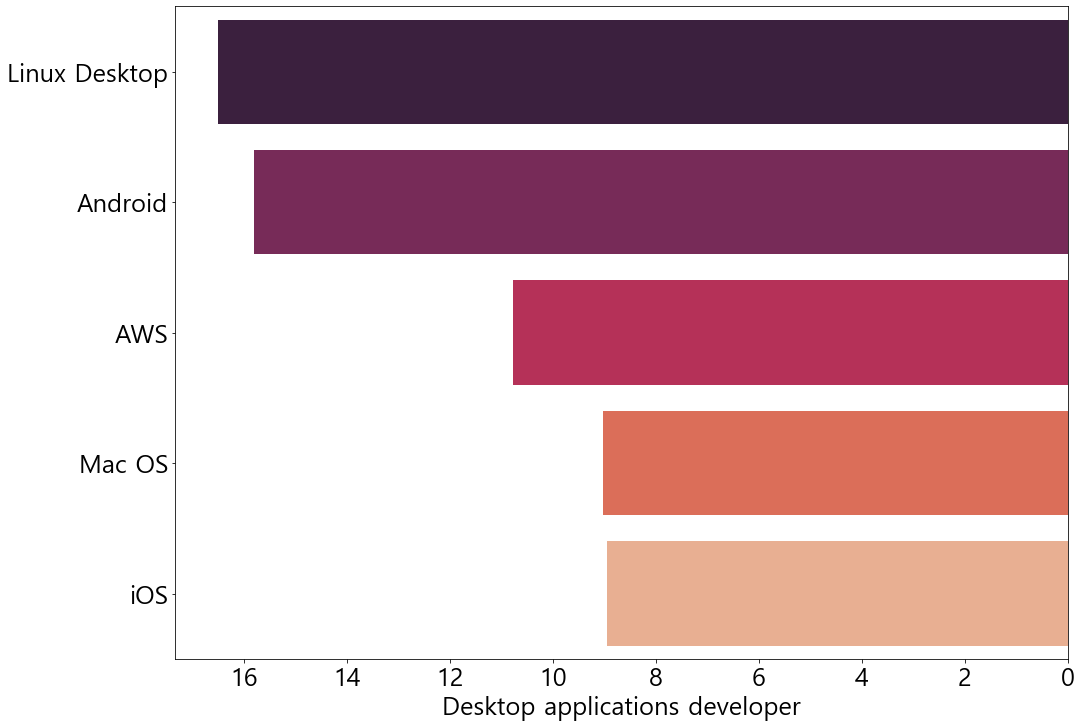

In [48]:
HWP_DT_Per_Top5 = HWP_DT_Per.sort_values(by=["Desktop applications developer"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Desktop applications developer',HWP_DT_Per_Top5.index,data=HWP_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Desktop_HaveWorkedPlatform.png', dpi=300)
fig

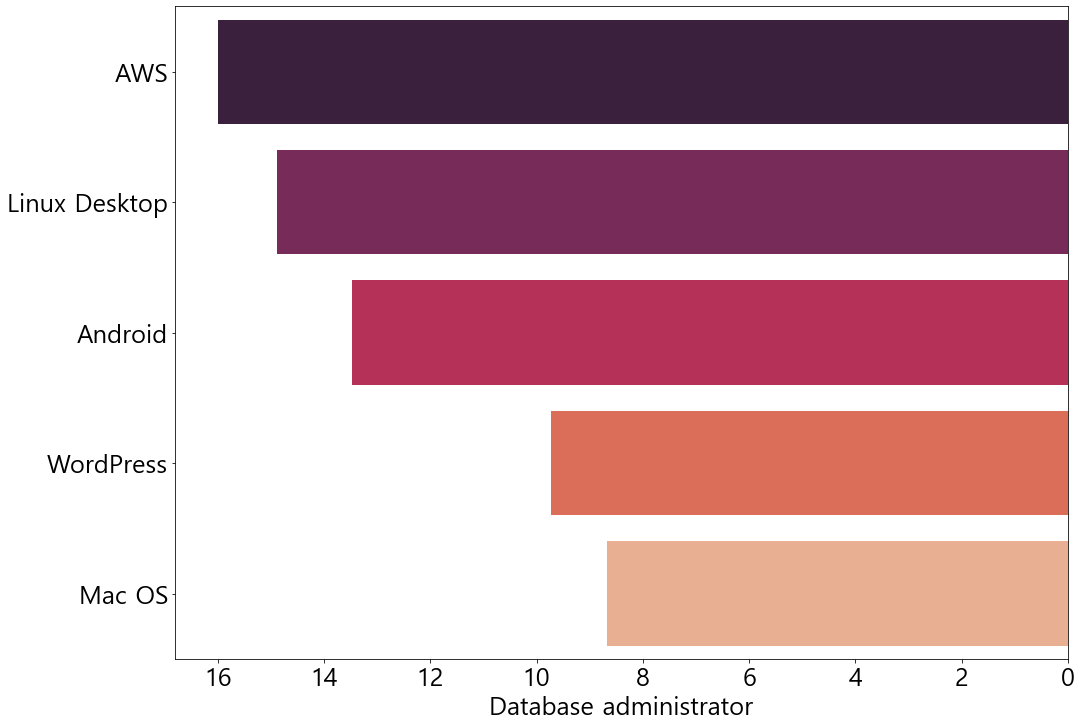

In [49]:
HWP_DT_Per_Top5 = HWP_DT_Per.sort_values(by=["Database administrator"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Database administrator',HWP_DT_Per_Top5.index,data=HWP_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Database_HaveWorkedPlatform.png', dpi=300)
fig

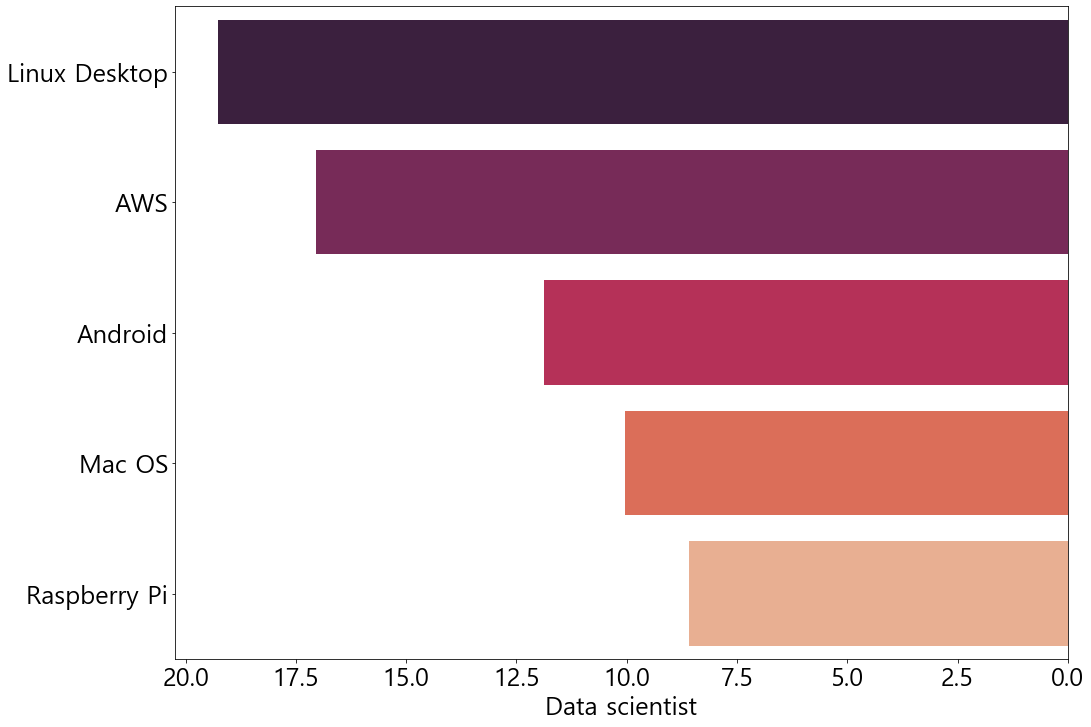

In [50]:
HWP_DT_Per_Top5 = HWP_DT_Per.sort_values(by=["Data scientist"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Data scientist',HWP_DT_Per_Top5.index,data=HWP_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Data_HaveWorkedPlatform.png', dpi=300)
fig

# HaveWorkedFramework

In [52]:
HWF = pd.read_csv("Dataframe_folder/language/HaveWorkedFramework_df.csv")
HWF.head()

,Unnamed: 0,Spark,React,.NET Core,Firebase,AngularJS,Node.js,Hadoop,Cordova,Xamarin
0,1,0,0,1,0,0,0,0,0,0
1,3,0,1,0,0,0,0,0,0,0
2,7,0,1,0,0,0,0,0,0,0
3,8,0,0,1,0,1,1,0,0,0
4,13,0,1,0,0,0,0,0,0,0


In [53]:
HWF_DT = pd.merge(DeveloperType,HWF,on='Unnamed: 0')
HWF = HWF_DT.loc[:,"Spark":"Xamarin"]
developerType = HWF_DT.loc[:,"Desktop applications developer":"Machine learning specialist"]
developerType_T = developerType.T
index =[]
DT =[]
for i in range(developerType.count()[1]):
    i_DT = []
    i_DT.append(developerType_T[developerType_T[i]==1][i].index)
    for dt in i_DT[0]:
        index.append(i)
        DT.append(dt)
    
developerType = pd.DataFrame({"index":index,"DeveloperType":DT} )  
HWF_DT = pd.merge(developerType,HWF,left_on = "index",right_index=True)
HWF_DT = HWF_DT.loc[:,"DeveloperType":"Xamarin"]
HWF_DT_Result = HWF_DT.groupby("DeveloperType").sum()
HWF_DT_Result["Sum"]=HWF_DT_Result.sum(axis=1)
HWF_DT_Result

,Spark,React,.NET Core,Firebase,AngularJS,Node.js,Hadoop,Cordova,Xamarin,Sum
DeveloperType,,,,,,,,,,
Data scientist,277,265,471,139,609,666,319,171,122,3039
Database administrator,119,454,1103,215,1210,1274,153,399,275,5202
Desktop applications developer,136,649,2705,337,2009,1911,196,535,697,9175
DevOps specialist,158,527,579,175,1050,1217,181,276,188,4351
Developer with a statistics or mathematics background,214,323,676,155,764,813,221,190,163,3519
Embedded applications/devices developer,51,185,597,129,494,653,88,208,171,2576
Graphic designer,19,188,216,114,361,418,26,153,82,1577
Graphics programming,19,151,357,72,318,415,38,129,106,1605
Machine learning specialist,166,135,218,74,280,322,170,90,62,1517


In [54]:
HWF_DT_Per = HWF_DT_Result
for i in range(len(HWF_DT_Result.columns)-1):
    HWF_DT_Per[HWF_DT_Per.columns[i]] = HWF_DT_Per[HWF_DT_Per.columns[i]]/HWF_DT_Per[HWF_DT_Per.columns[len(HWF_DT_Per.columns)-1]]*100
HWF_DT_Per = HWF_DT_Per.loc[:,"Spark":"Xamarin"]
HWF_DT_Per = HWF_DT_Per.T

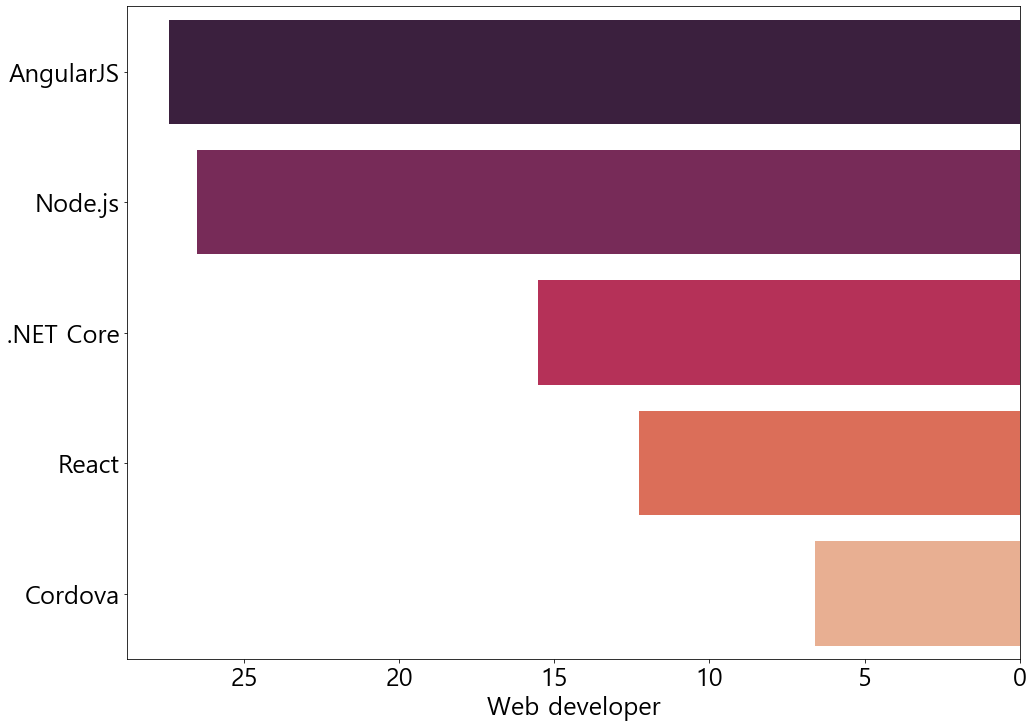

In [55]:
HWF_DT_Per_Top5 = HWF_DT_Per.sort_values(by=["Web developer"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Web developer',HWF_DT_Per_Top5.index,data=HWF_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Web_HaveWorkedFramework.png', dpi=300)
fig

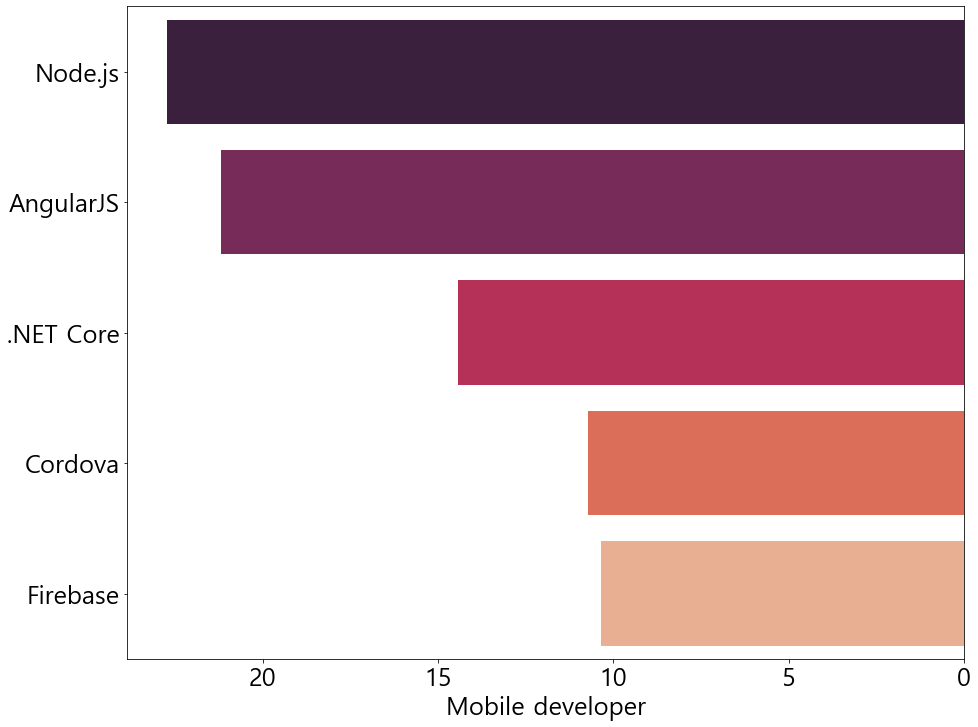

In [56]:
HWF_DT_Per_Top5 = HWF_DT_Per.sort_values(by=["Mobile developer"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Mobile developer',HWF_DT_Per_Top5.index,data=HWF_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Mobile_HaveWorkedFramework.png', dpi=300)
fig

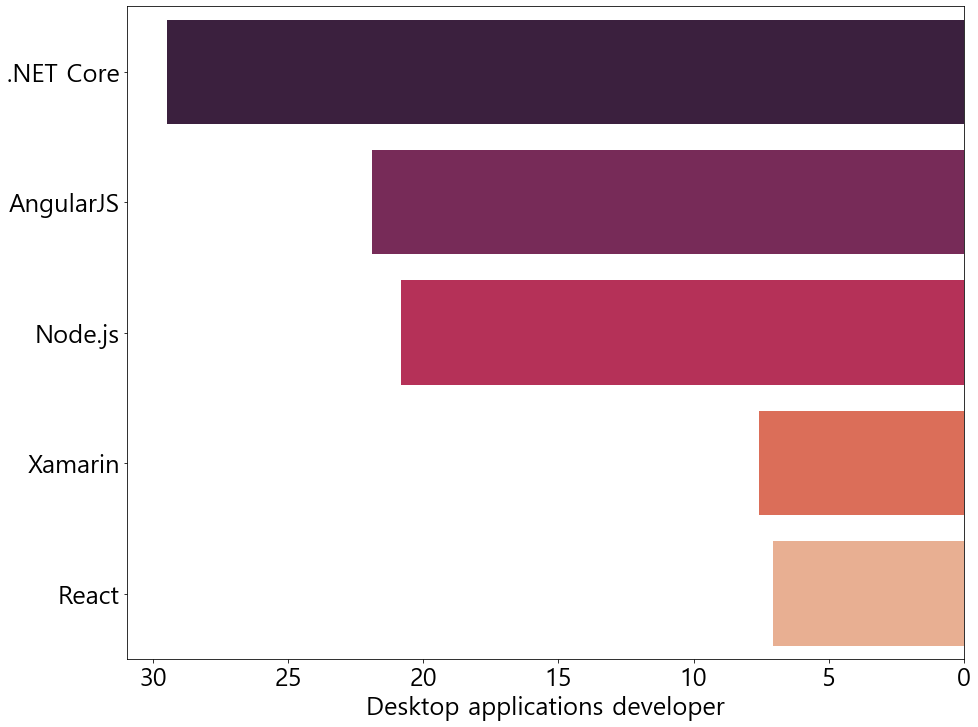

In [55]:
HWF_DT_Per_Top5 = HWF_DT_Per.sort_values(by=["Desktop applications developer"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Desktop applications developer',HWF_DT_Per_Top5.index,data=HWF_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Desktop_HaveWorkedFramework.png', dpi=300)
fig

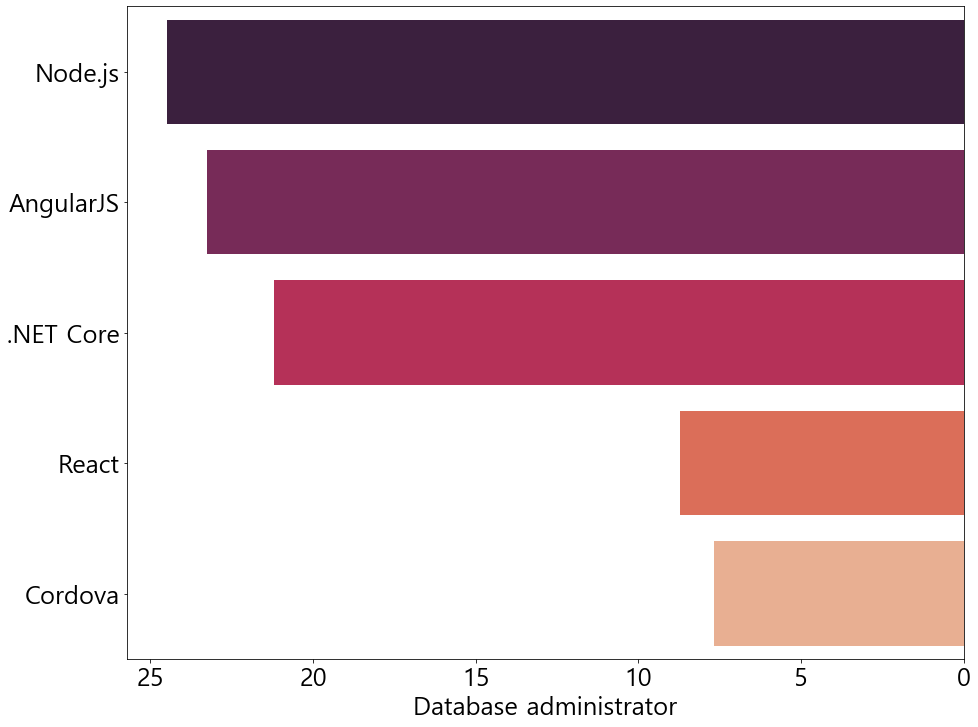

In [56]:
HWF_DT_Per_Top5 = HWF_DT_Per.sort_values(by=["Database administrator"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Database administrator',HWF_DT_Per_Top5.index,data=HWF_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Database_HaveWorkedFramework.png', dpi=300)
fig

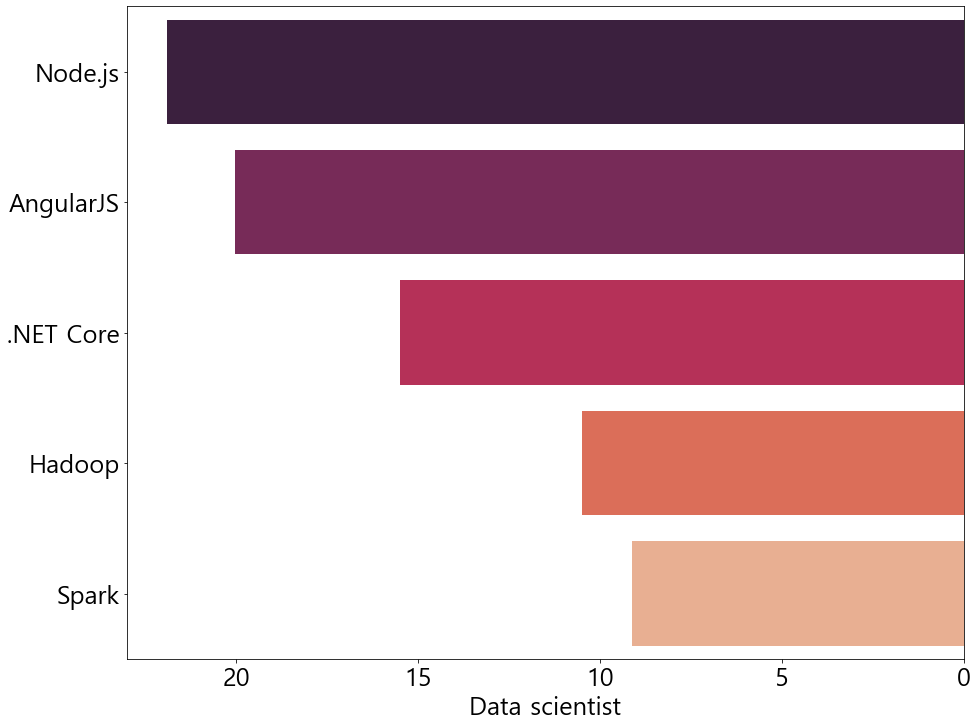

In [62]:
HWF_DT_Per_Top5 = HWF_DT_Per.sort_values(by=["Data scientist"] , ascending=False).head(5)
plt.figure(figsize=(16,12))
fig = sns.barplot('Data scientist',HWF_DT_Per_Top5.index,data=HWF_DT_Per_Top5,palette="rocket")
fig.invert_xaxis()
fig.get_figure().savefig('../Test_app/static/img/developerType/Datab_HaveWorkedFramework.png', dpi=300)
fig

# HomeRemote

- HomeRemote 와 developerType의 결측치 제거

In [67]:
data_directory = 'Original_data/survey_results_public.csv'
df = pd.read_csv(data_directory)

In [71]:
HR = df[["HomeRemote"]].dropna()
HR.head()

,HomeRemote
1,"More than half, but not all, the time"
2,"Less than half the time, but at least one day ..."
3,"Less than half the time, but at least one day ..."
4,Never
6,"Less than half the time, but at least one day ..."


In [94]:
HomeRemote = pd.merge(DeveloperType,HR,left_on='Unnamed: 0',right_index=True)
HomeRemote = HomeRemote.loc[:,"Desktop applications developer":"HomeRemote"]
HomeRemote = HomeRemote.groupby("HomeRemote").sum()

In [95]:
HomeRemote = HomeRemote.T

HomeRemote_result= HomeRemote.loc[:,"A few days each month":"More than half, but not all, the time"].sum(axis=1)

In [148]:
HomeRemote_result = HomeRemote[["Never"]]
HomeRemote_result["ever"] = HomeRemote.loc[:,"A few days each month":"More than half, but not all, the time"].sum(axis=1)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [165]:
HomeRemote_result = HomeRemote.loc[:,"A few days each month":"More than half, but not all, the time"]
HomeRemote_result["Yes"] = HomeRemote_result.sum(axis=1)
HomeRemote_result["No"] = HomeRemote["Never"]
HomeRemote_result = HomeRemote_result.loc[:,"Yes":"No"]
HomeRemote_result["Sum"] = HomeRemote_result.sum(axis=1)
HomeRemote_result

HomeRemote,Yes,No,Sum
Desktop applications developer,6747,3396,10143.0
Embedded applications/devices developer,2110,1133,3243.0
Mobile developer,5900,2199,8099.0
DevOps specialist,3104,814,3918.0
Web developer,17989,7665,25654.0
Other,1925,682,2607.0
Database administrator,3869,1189,5058.0
Systems administrator,3071,887,3958.0
Graphic designer,1082,283,1365.0
Developer with a statistics or mathematics background,2903,1065,3968.0


In [166]:
HomeRemote_Per = HomeRemote_result
for i in range(len(HomeRemote_Per.columns)-1):
     HomeRemote_Per[HomeRemote_Per.columns[i]] = HomeRemote_Per[HomeRemote_Per.columns[i]]/HomeRemote_Per[HomeRemote_Per.columns[len(HomeRemote_Per.columns)-1]]*100
HomeRemote_Per = HomeRemote_Per.loc[:,"Yes":"No"]